# Preparação dos dados

## Objetivo
Este notebook tem como objetivo aplicar e documentar todas as transformações realizadas durante a etapa de **Exploração de Dados (EDA)**, organizando funções genéricas e transformações específicas por arquivo.  
O fluxo foi pensado para ser **parametrizável**, permitindo reutilização futura com mínimo esforço.

---

## Conteúdos

- [1. Importação de Bibliotecas](#1-importação-de-bibliotecas)
- [2. Leitura dos Arquivos](#2-leitura-dos-arquivos)
- [3. Definição de Funções de Transformação](#3-definição-de-funções-genéricas)
- [4. Aplicação das Funções de Transformação](#4-transformações-específicas-por-arquivo)
- [5. Armazenamento dos Dados](#5-integração-dos-resultados)

---

## 1. Importação de bibliotecas
<a id="1-importação-de-bibliotecas"></a>

In [76]:
import pandas as pd
import numpy as np
import unidecode
from IPython.display import display, HTML
import unicodedata
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Leitura dos arquivos
<a id="2-leitura-dos-arquivos"></a>

### 2.1 Arquivo PEDE2022
<a id="21-arquivo-2022"></a>

In [2]:
# Dados de 2022
df_2022 = pd.read_excel('../data/raw/BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name='PEDE2022')
with pd.option_context('display.max_columns', None):
    display(df_2022.head(2))

,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,INDE 22,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,Rec Psicologia,IDA,Matem,Portug,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,Ametista,Quartzo,5.783,753,18,10,4,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,Ametista,Ametista,7.055,469,8,3,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


### 2.2 Arquivo PEDE2023
<a id="22-arquivo-2023"></a>

In [3]:
# Dados de 2023
df_2023 = pd.read_excel('../data/raw/BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name='PEDE2023')
with pd.option_context('display.max_columns', None):
    display(df_2023.head(2))

,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
0,RA-861,ALFA,9.31095,Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,9.5,10.0,8.13,8.4375,NaN,9.6,9.8,9.4,NaN,NaN,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
1,RA-862,ALFA,8.22120,Topázio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,9.1,8.14,7.5000,NaN,8.9,8.5,9.2,NaN,NaN,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN


### 2.3 Arquivo PEDE2024
<a id="23-arquivo-2024"></a>

In [4]:
# Dados de 2024
df_2024 = pd.read_excel('../data/raw/BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name='PEDE2024')
with pd.option_context('display.max_columns', None):
    display(df_2024.head(2))

,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Avaliador4,Avaliador5,Avaliador6,IAA,IEG,IPS,IPP,Rec Psicologia,IDA,Mat,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1275,ALFA,7.611367,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28,8,Masculino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.002,8.666667,6.26,5.625,NaN,8.0,10.0,6.0,NaN,NaN,NaN,5.446667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,8.002867,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16,8,Feminino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.002,9.333333,3.76,7.500,NaN,8.0,10.0,6.0,NaN,NaN,NaN,7.050000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando


## 3. Definição das Funções de Transformação
<a id="3-definicao_funcoes"></a>
Funções para:
- Renomear as colunas
- Codificar o gênero
- Tratamento de valores ausentes  
- Cálculo do ano de ingresso na Passos Mágicos
- Cálculo da Idade do Aluno
- Padronização das Classes de Pedra
- Ordenação das Classes de Pedra
- Calcular Avaliações
- Classificação de Destaque e Melhoria
- Classificação da Avaliação Psicológica
- Classificação da Defasagem
- Padronização do Nome da Fase
- Indicador de Recebimento de BOlsa de Estudos



### 3.1 Função Renomear as colunas
<a id="31-renomear_colunas"></a>

In [5]:
def rename_cols(df: pd.DataFrame, rename_dict: dict) -> pd.DataFrame:
    """
    Renomeia colunas de um DataFrame com base em um dicionário de mapeamento.

    Parâmetros
    ----------
    df : pd.DataFrame
        DataFrame original cujas colunas serão renomeadas.
    rename_dict : dict
        Dicionário contendo o mapeamento {coluna_antiga: coluna_nova}.

    Retorno
    -------
    pd.DataFrame
        DataFrame com as colunas renomeadas conforme o dicionário fornecido.

    Exemplo
    -------
    >>> df = pd.DataFrame({"A": [1, 2], "B": [3, 4]})
    >>> rename_dict = {"A": "coluna1", "B": "coluna2"}
    >>> rename_cols(df, rename_dict)
       coluna1  coluna2
    0        1        3
    1        2        4
    """
    return df.rename(columns=rename_dict)

### 3.2 Codificar o gênero
<a id="32-codificar_genero"></a>

In [6]:
def encode_gender(df: pd.DataFrame, 
                     col_origem: str = "nome_genero", 
                     col_destino: str = "cod_genero", 
                     mapa: dict = None) -> pd.DataFrame:
    """
    Codifica valores de gênero em uma coluna do DataFrame.

    Parâmetros
    ----------
    df : pd.DataFrame
        DataFrame original contendo a coluna de gênero.
    col_origem : str, default "nome_genero"
        Nome da coluna de origem com os valores de gênero.
    col_destino : str, default "cod_genero"
        Nome da nova coluna que receberá os códigos.
    mapa : dict, optional
        Dicionário de mapeamento {valor_texto: código}.
        Se None, será usado o padrão:
        {"Menino": 0, "Masculino": 0, "Menina": 1, "Feminino": 1}

    Retorno
    -------
    pd.DataFrame
        DataFrame com a nova coluna de códigos de gênero.

    Exemplo
    -------
    >>> df = pd.DataFrame({"nome_genero": ["Menino", "Menina", "Masculino", "Feminino", "Outro"]})
    >>> codificar_genero(df)
       nome_genero  cod_genero
    0       Menino           0
    1       Menina           1
    2    Masculino           0
    3     Feminino           1
    4        Outro       Outro
    """
    if mapa is None:
        mapa = {"Menino": 0, "Masculino": 0, "Menina": 1, "Feminino": 1}
    
    df[col_destino] = df[col_origem].map(mapa).fillna(df[col_origem])
    return df

### 3.3 Cálculo do ano de ingresso na Passos Mágicos
<a id="33-calculo_ano_ingresso"></a>


In [7]:
def calcular_fase_ingresso(df: pd.DataFrame, ano_atual_ref: int = 2022) -> pd.DataFrame:
    """
    Calcula a idade de ingresso e estima a fase de ingresso de indivíduos em um DataFrame.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo pelo menos as colunas 'num_ano_ingresso' e 'num_idade'.
    ano_atual_ref : int, opcional
        Ano de referência para o cálculo da idade de ingresso (default = 2022).

    Retorno
    -------
    pandas.DataFrame
        O mesmo DataFrame de entrada, acrescido das colunas:
        - 'idade_ingresso': idade estimada no ano de ingresso.
        - 'fase_ingresso_estimada': fase correspondente à idade de ingresso.
    """

    if 'num_ano_ingresso' in df.columns and 'num_idade' in df.columns:
        # Idade que tinha quando entrou
        df['idade_ingresso'] = df['num_idade'] - (ano_atual_ref - df['num_ano_ingresso'])

        # Função auxiliar para estimar fase
        def estimar_fase_ingresso(idade: int) -> str:
            if idade < 7: return '0'
            if 7 <= idade <= 8: return '0'
            if 8 < idade <= 9: return '1'
            if 10 <= idade <= 11: return '2'
            if 12 <= idade <= 13: return '3'
            if idade == 14: return '4'
            if idade == 15: return '5'
            if idade == 16: return '6'
            if idade == 17: return '7'
            if idade == 18: return '8'
            if idade >= 19: return '9'
            return 'Desconhecida'

        df['fase_ingresso_estimada'] = df['idade_ingresso'].apply(estimar_fase_ingresso)

    return df

### 3.4 Cálculo da Idade do Aluno
<a id="34-calculo_idade_aluno"></a>


In [8]:
def corrigir_idade(df: pd.DataFrame, ano_referencia: int) -> pd.DataFrame:
    """
    Corrige valores da coluna 'num_idade' com base na coluna 'num_ano_nascimento'.
    Extrai apenas o ano de nascimento e recalcula a idade considerando um ano de referência.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo as colunas 'num_idade' e 'num_ano_nascimento'.
    ano_referencia : int
        Ano usado como referência para calcular a idade.

    Retorno
    -------
    pandas.DataFrame
        O mesmo DataFrame com:
        - 'num_ano_nascimento' (apenas o ano extraído da coluna original).
        - 'num_idade' (idade recalculada com base no ano de nascimento).
    """


    df['num_ano_nascimento'] = pd.to_datetime(df['num_ano_nascimento'], errors='coerce').dt.year

    df['num_idade'] = ano_referencia - df['num_ano_nascimento']

    return df

### 3.5 Categorização da Instituição de Ensino
<a id="35-categorizacao_instituicao_ensino"></a>


In [9]:
def flag_escola_publica(df: pd.DataFrame, coluna: str = 'instituicao_ensino') -> pd.DataFrame:
    """
    Cria uma coluna binária indicando se a instituição de ensino é pública.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo a coluna com o nome da instituição de ensino.
    coluna : str, opcional
        Nome da coluna que contém a descrição da instituição (default = 'instituicao_ensino').

    Retorno
    -------
    pandas.DataFrame
        O mesmo DataFrame com a coluna adicional:
        - 'is_escola_publica': 1 se a instituição for pública, 0 caso contrário.
    """

    df['is_escola_publica'] = (
        df[coluna]
        .astype(str)
        .str.lower()
        .str.contains('pública|publica')
        .astype(int)
    )

    return df

### 3.6 Padronização das Classes de Pedra
<a id="36-padronizacao_classes_pedra"></a>


In [10]:
def converter_alfanumerico(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    """
    Converte os valores das colunas especificadas para formato alfanumérico:
    - Remove acentos.
    - Remove caracteres especiais.
    - Substitui valores NaN por 'ausente'.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo as colunas a serem convertidas.
    cols : list
        Lista de nomes das colunas que devem ser convertidas.

    Retorno
    -------
    pandas.DataFrame
        DataFrame com as colunas convertidas para valores alfanuméricos.
    """

    def normalizar_texto(valor):
        if pd.isna(valor):
            return "ausente"
        # Converter para string
        valor = str(valor).lower()
        # Remover acentos
        valor = unicodedata.normalize('NFKD', valor).encode('ASCII', 'ignore').decode('utf-8')
        # Manter apenas letras, números e espaço
        valor = re.sub(r'[^a-z0-9 ]', '', valor)
        return valor.strip()

    for col in cols:
        if col in df.columns:
            df[col] = df[col].apply(normalizar_texto)

    return df

### 3.7 Ordenação das Classes de Pedra
<a id="37-ordenacao_classes_pedra"></a>


In [11]:
def ordenar_pedras(
    df: pd.DataFrame,
    ordem_pedras: dict = None,
    cols_pedra: list = None
) -> pd.DataFrame:
    """
    Realiza o tratamento das colunas de pedras:
    - Substitui valores NaN por 'ausente'.
    - Cria colunas numéricas temporárias com base no mapeamento ordinal.
    - Considera 'ausente' como 0 no cálculo.
    - Calcula indicadores de mudança como diferença entre categorias
      (ex.: caiu 2 categorias -> -2, subiu 1 categoria -> +1).
    - Nomeia colunas de mudança como 'mudanca_class_pedra_XX_YY' (anos consecutivos).
    - Mantém as colunas originais.
    - Aplica one-hot encoding sem remover as colunas originais.
    """

    if ordem_pedras is None:
        ordem_pedras = {'quartzo': 1, 'agata': 2, 'ametista': 3, 'topazio': 4}

    # Detectar automaticamente colunas de pedras se não forem passadas
    if cols_pedra is None:
        cols_pedra = [c for c in df.columns if c.startswith("class_pedra")]
        # ordenar pela parte numérica do nome
        cols_pedra = sorted(cols_pedra, key=lambda x: int(x.split("_")[-1]))

    # Substituir NaN por 'ausente'
    df[cols_pedra] = df[cols_pedra].fillna('ausente')

    # Criar versões numéricas temporárias (ausente = 0)
    for col in cols_pedra:
        df[f'{col}_num'] = df[col].map(ordem_pedras).fillna(0).astype(int)

    # Criar colunas de mudança entre anos consecutivos
    for i in range(len(cols_pedra) - 1):
        col_atual = f"{cols_pedra[i]}_num"
        col_prox = f"{cols_pedra[i+1]}_num"
        ano_atual = cols_pedra[i].split("_")[-1]
        ano_prox = cols_pedra[i+1].split("_")[-1]
        nome_coluna = f"mudanca_class_pedra_{ano_atual}_{ano_prox}"
        df[nome_coluna] = (df[col_prox] - df[col_atual]).astype(int)

    # Remover colunas temporárias
    cols_temp = [f"{c}_num" for c in cols_pedra]
    df.drop(columns=cols_temp, inplace=True)

    # One-hot encoding sem remover colunas originais
    dummies = pd.get_dummies(df[cols_pedra], prefix=cols_pedra, dtype=int)
    df = pd.concat([df, dummies], axis=1)

    return df

### 3.8 Calcular Avaliações
<a id="38-calcular_avaliacoes"></a>


In [12]:
def calcular_avaliacoes(df: pd.DataFrame, mapa_avaliacao: dict = None) -> pd.DataFrame:
    """
    Calcula métricas de avaliação a partir das colunas de observações dos avaliadores.

    - Identifica automaticamente as colunas que contêm 'observ_avaliador_' no nome.
    - Preenche valores NaN com 'Não avaliado'.
    - Converte as avaliações para valores numéricos conforme o mapeamento ordinal.
    - Calcula média, melhor e pior avaliação.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo as colunas de observações dos avaliadores.
    mapa_avaliacao : dict, opcional
        Dicionário de mapeamento ordinal das avaliações.
        Default:
            {
                'Alocado em Fase anterior': 0,
                'Não avaliado': 1,
                'Mantido na Fase atual': 2,
                'Mantido na Fase + Bolsa': 3,
                'Promovido de Fase': 4,
                'Promovido de Fase + Bolsa': 5
            }

    Retorno
    -------
    pandas.DataFrame
        DataFrame com colunas adicionais:
        - 'media_avaliadores'
        - 'melhor_avaliacao_score'
        - 'pior_avaliacao_score'
    """

    # Definir mapeamento padrão se não for fornecido
    if mapa_avaliacao is None:
        mapa_avaliacao = {
            'Alocado em Fase anterior': 0,
            'Não avaliado': 1,
            'Mantido na Fase atual': 2,
            'Mantido na Fase + Bolsa': 3,
            'Promovido de Fase': 4,
            'Promovido de Fase + Bolsa': 5
        }

    # Identificar colunas de avaliadores
    cols_avaliadores = [c for c in df.columns if 'observ_avaliador_' in c]

    if cols_avaliadores:
        # Preencher NaN com "Não avaliado"
        df[cols_avaliadores] = df[cols_avaliadores].fillna('Não avaliado')

        # Criar dataframe temporário numérico para cálculos
        df_aval_num = df[cols_avaliadores].replace(mapa_avaliacao).infer_objects(copy=False).astype(int)

        # Converter para numérico forçando erros a NaN
        df_aval_num = df_aval_num.apply(pd.to_numeric, errors='coerce')

        # Melhor e pior nota
        df['melhor_avaliacao_score'] = df_aval_num.max(axis=1)
        df['pior_avaliacao_score'] = df_aval_num.min(axis=1)

    return df

### 3.9 Classificação de Destaque e Melhoria
<a id="39-classificaca0_destaque_melhoria"></a>

In [13]:
def extrair_flags_texto(df: pd.DataFrame, cols_texto_obs: list = None) -> pd.DataFrame:
    """
    Cria flags binárias indicando se os campos de texto contêm as palavras
    'Destaque' ou 'Melhorar'.

    - Para cada coluna especificada, gera duas novas colunas:
        * {col}_tem_destaque → 1 se contém 'Destaque', 0 caso contrário.
        * {col}_tem_melhorar → 1 se contém 'Melhorar', 0 caso contrário.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo os campos de texto.
    cols_texto_obs : list, opcional
        Lista de colunas de texto a serem analisadas.
        Default = ['observ_engajamento', 'observ_aprendizagem', 'observ_ponto_virada']

    Retorno
    -------
    pandas.DataFrame
        DataFrame com as colunas adicionais de flags binárias.
    """

    if cols_texto_obs is None:
        cols_texto_obs = ['observ_engajamento', 'observ_aprendizagem', 'observ_ponto_virada']

    for col in cols_texto_obs:
        if col in df.columns:
            df[f'{col}_tem_destaque'] = df[col].astype(str).str.contains('Destaque', case=False, na=False).astype(int)
            df[f'{col}_tem_melhorar'] = df[col].astype(str).str.contains('Melhorar', case=False, na=False).astype(int)

    return df

### 3.10 Classificação da Avaliação Psicológica
<a id="310-classificaca0_destaque_melhoria"></a>

In [14]:
def flag_atencao_psicologica(df: pd.DataFrame, coluna: str = 'observ_psico') -> pd.DataFrame:
    """
    Cria uma flag binária indicando necessidade de atenção psicológica.

    - Verifica se a coluna de avaliação psicológica existe no DataFrame.
    - Marca como 1 se o valor estiver em ['Requer avaliação', 'Não indicado'].
    - Caso contrário, marca como 0.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo a coluna de avaliação psicológica.
    coluna : str, opcional
        Nome da coluna a ser analisada. Default = 'observ_psico'.

    Retorno
    -------
    pandas.DataFrame
        DataFrame com a coluna adicional 'flag_psico_atencao'.
    """

    if coluna in df.columns:
        valores_atencao = ['Requer avaliação', 'Não indicado']
        df['flag_observ_psico'] = df[coluna].isin(valores_atencao).astype(int)

    return df

### 3.11 Classificação da Defasagem
<a id="311-classificaca0_defasagem"></a>

In [15]:
def criar_flags_defasagem(df: pd.DataFrame, col_defasagem: str = 'qtd_defasagem') -> pd.DataFrame:
    """
    Cria flags binárias para indicar defasagem positiva ou negativa.

    - defasagem_positiva: 1 se o valor da coluna for > 0, senão 0.
    - defasagem_negativa: 1 se o valor da coluna for < 0, senão 0.

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo a coluna de defasagem.
    col_defasagem : str, opcional
        Nome da coluna a ser analisada. Default = 'qtd_defasagem'.

    Retorno
    -------
    pandas.DataFrame
        DataFrame com as colunas adicionais 'defasagem_positiva' e 'defasagem_negativa'.
    """

    if col_defasagem in df.columns:
        df['defasagem_positiva'] = df[col_defasagem].apply(lambda x: 1 if x > 0 else 0)
        df['defasagem_negativa'] = df[col_defasagem].apply(lambda x: 1 if x < 0 else 0)

    return df

### 3.12 Padronização do Nome da Fase
<a id="312-padronizacao_nome_fase"></a>

In [16]:
def padronizar_fase(df: pd.DataFrame, col_fase: str = "nome_fase") -> pd.DataFrame:
    """
    Padroniza os nomes das fases em valores numéricos de 0 a 9.

    - ALFA → 0
    - FASE X → número correspondente
    - Valores como '1A', '2B', etc. → número antes da letra
    - Se já for número, mantém
    - Valores não reconhecidos → NaN

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo a coluna de fase.
    col_fase : str, opcional
        Nome da coluna com os valores de fase. Default = 'nome_fase'.

    Retorno
    -------
    pandas.DataFrame
        DataFrame com coluna adicional 'num_fase_atual' padronizada.
    """

    def converter_fase(valor):
        if pd.isna(valor):
            return None
        valor_str = str(valor).strip().upper()

        if valor_str == "ALFA":
            return 0
        # Caso "FASE X"
        if valor_str.startswith("FASE"):
            try:
                return int(valor_str.replace("FASE", "").strip())
            except ValueError:
                return None
        # Caso "1A", "2B", etc.
        match = re.match(r"^(\d+)", valor_str)
        if match:
            return int(match.group(1))
        # Caso já seja número
        try:
            return int(valor_str)
        except ValueError:
            return None

    df["num_fase_atual"] = df[col_fase].apply(converter_fase)
    return df

### 3.13 Indicador de Recebimento de BOlsa de Estudos
<a id="313-indicador_bolsa"></a>

In [17]:
def criar_flag_bolsa(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Cria uma coluna binária 'flag_bolsa_estudos' indicando se há bolsa de estudos.

    Regras:
    - Para colunas tipo 'flag_indicado_bolsa' (Sim/Não):
        'Sim' -> 1, 'Não' -> 0
    - Para colunas tipo 'instituicao_ensino':
        Considera bolsa se o valor contiver palavras-chave como:
        'Bolsa', 'Apadrinhamento', 'Parceira'
    - Valores não relacionados a bolsa -> 0

    Parâmetros
    ----------
    df : pandas.DataFrame
        DataFrame contendo a coluna de referência.
    col : str
        Nome da coluna que contém a informação de bolsa.

    Retorno
    -------
    pandas.DataFrame
        DataFrame com coluna adicional 'flag_bolsa_estudos'.
    """

    if col not in df.columns:
        raise ValueError(f"A coluna '{col}' não existe no DataFrame.")

    # Normalizar para string minúscula, substituindo NaN por vazio
    serie = df[col].fillna("").astype(str).str.lower()

    if col == "flag_indicado_bolsa":
        df["flag_bolsa_estudos"] = serie.map({"sim": 1, "não": 0}).fillna(0).astype(int)

    elif col == "instituicao_ensino":
        palavras_bolsa = ["bolsa", "apadrinhamento", "parceria", "parceira"]
        df["flag_bolsa_estudos"] = serie.apply(
            lambda x: 1 if any(p in x for p in palavras_bolsa) else 0
        ).astype(int)

    else:
        df["flag_bolsa_estudos"] = 0

    return df

## 4 Aplicação das Funções de Transformação
<a id="411-renomear_colunas_2022"></a>


### 4.1 Aplicação da Função Renomear as Colunas
<a id="41-renomear_colunas"></a>

### 4.1.1 Renomear as colunas base de 2022
<a id="411-renomear_colunas_2022"></a>

In [18]:
rename_dict_2022 = {
        "RA": "registro_unico",
        "Fase": "nome_fase",
        "Turma": "nome_turma",
        "Ano nasc": "num_ano_nascimento",
        "Nome": "nome_anonimizado",
        "Idade 22": "num_idade",
        "Gênero": "nome_genero",
        "Ano ingresso": "num_ano_ingresso",
        "Instituição de ensino": "instituicao_ensino",
        "Pedra 20": "class_pedra_20",
        "Pedra 21": "class_pedra_21",
        "Pedra 22": "class_pedra_22",
        "INDE 22": "indic_desenv_educ_22",
        "Cg": "class_geral",
        "Cf": "class_fase",
        "Ct": "class_turma",
        "Nº Av": "num_avaliacao",
        "Avaliador1": "nome_avaliador_1",
        "Rec Av1": "observ_avaliador_1",
        "Avaliador2": "nome_avaliador_2",
        "Rec Av2": "observ_avaliador_2",
        "Avaliador3": "nome_avaliador_3",
        "Rec Av3": "observ_avaliador_3",
        "Avaliador4": "nome_avaliador_4",
        "Rec Av4": "observ_avaliador_4",
        "IAA": "indic_auto_avaliacao",
        "IEG": "indic_engajamento",
        "IPS": "indic_psicossocial",
        "Rec Psicologia": "observ_psico",
        "IDA": "indic_aprendizagem",
        "Matem": "nota_media_matematica",
        "Portug": "nota_media_portugues",
        "Inglês": "nota_media_ingles",
        "Indicado": "flag_indicado_bolsa",
        "Atingiu PV": "flag_atingiu_ponto_virada",
        "IPV": "nota_media_ponto_virada",
        "IAN": "nota_media_adequacao",
        "Fase ideal": "fase_nome_ideal",
        "Defas": "qtd_defasagem", 
        "Destaque IEG": "observ_engajamento",
        "Destaque IDA": "observ_aprendizagem",
        "Destaque IPV": "observ_ponto_virada"
    }

df_2022 = rename_cols(df_2022, rename_dict_2022)
with pd.option_context('display.max_columns', None):
    display(df_2022.head(2))

,registro_unico,nome_fase,nome_turma,nome_anonimizado,num_ano_nascimento,num_idade,nome_genero,num_ano_ingresso,instituicao_ensino,class_pedra_20,class_pedra_21,class_pedra_22,indic_desenv_educ_22,class_geral,class_fase,class_turma,num_avaliacao,nome_avaliador_1,observ_avaliador_1,nome_avaliador_2,observ_avaliador_2,nome_avaliador_3,observ_avaliador_3,nome_avaliador_4,observ_avaliador_4,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,observ_psico,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,flag_indicado_bolsa,flag_atingiu_ponto_virada,nota_media_ponto_virada,nota_media_adequacao,fase_nome_ideal,qtd_defasagem,observ_engajamento,observ_aprendizagem,observ_ponto_virada
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,Ametista,Quartzo,5.783,753,18,10,4,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,Ametista,Ametista,7.055,469,8,3,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


#### 4.1.2 Renomear as colunas base de 2023
<a id="412-renomear_colunas_2023"></a>

In [19]:
rename_dict_2023 = {
        "RA": "registro_unico",
        "Fase": "nome_fase",
        "Turma": "nome_turma",
        "Data de Nasc": "num_ano_nascimento",
        "Nome Anonimizado": "nome_anonimizado",
        "Idade": "num_idade",
        "Gênero": "nome_genero",
        "Ano ingresso": "num_ano_ingresso",
        "Instituição de ensino": "instituicao_ensino",
        "Pedra 20": "class_pedra_20",
        "Pedra 21": "class_pedra_21",
        "Pedra 22": "class_pedra_22",
        "INDE 22": "indic_desenv_educ_22",
        "Pedra 2023": "class_pedra_23",
        "INDE 2023": "indic_desenv_educ_23",
        "Cg": "class_geral",
        "Cf": "class_fase",
        "Ct": "class_turma",
        "Nº Av": "num_avaliacao",
        "Avaliador1": "nome_avaliador_1",
        "Rec Av1": "observ_avaliador_1",
        "Avaliador2": "nome_avaliador_2",
        "Rec Av2": "observ_avaliador_2",
        "Avaliador3": "nome_avaliador_3",
        "Rec Av3": "observ_avaliador_3",
        "Avaliador4": "nome_avaliador_4",
        "Rec Av4": "observ_avaliador_4",
        "IAA": "indic_auto_avaliacao",
        "IEG": "indic_engajamento",
        "IPS": "indic_psicossocial",
        "Rec Psicologia": "observ_psico",
        "IDA": "indic_aprendizagem",
        "Mat": "nota_media_matematica",
        "Por": "nota_media_portugues",
        "Ing": "nota_media_ingles",
        "Indicado": "flag_indicado_bolsa",
        "Atingiu PV": "flag_atingiu_ponto_virada",
        "IPV": "nota_media_ponto_virada",
        "IAN": "nota_media_adequacao",
        "Fase Ideal": "fase_nome_ideal",
        "Defasagem": "qtd_defasagem",
        "Destaque IEG": "observ_engajamento",
        "Destaque IDA": "observ_aprendizagem",
        "Destaque IPV": "observ_ponto_virada"
    }

df_2023 = rename_cols(df_2023, rename_dict_2023)
with pd.option_context('display.max_columns', None):
    display(df_2023.head(2))

,registro_unico,nome_fase,indic_desenv_educ_23,class_pedra_23,nome_turma,nome_anonimizado,num_ano_nascimento,num_idade,nome_genero,num_ano_ingresso,instituicao_ensino,class_pedra_20,class_pedra_21,class_pedra_22,Pedra 23,indic_desenv_educ_22,INDE 23,class_geral,class_fase,class_turma,num_avaliacao,nome_avaliador_1,observ_avaliador_1,nome_avaliador_2,observ_avaliador_2,nome_avaliador_3,observ_avaliador_3,nome_avaliador_4,observ_avaliador_4,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,IPP,observ_psico,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,flag_indicado_bolsa,flag_atingiu_ponto_virada,nota_media_ponto_virada,nota_media_adequacao,fase_nome_ideal,qtd_defasagem,observ_engajamento,observ_aprendizagem,observ_ponto_virada,Destaque IPV.1
0,RA-861,ALFA,9.31095,Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,9.5,10.0,8.13,8.4375,NaN,9.6,9.8,9.4,NaN,NaN,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
1,RA-862,ALFA,8.22120,Topázio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,8.5,9.1,8.14,7.5000,NaN,8.9,8.5,9.2,NaN,NaN,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN


In [20]:
df_2023["flag_indicado_bolsa"].unique()

array([nan])

#### 4.1.3 Renomear as colunas base de 2024
<a id="413-renomear_colunas_2024"></a>

In [21]:
rename_dict_2024 = {
        "RA": "registro_unico",
        "Fase": "nome_fase",
        "INDE 2024": "indic_desenv_educ_24",
        "Pedra 2024": "class_pedra_24",
        "Turma": "nome_turma",
        "Data de Nasc": "num_ano_nascimento",
        "Nome Anonimizado": "nome_anonimizado",
        "Idade": "num_idade",
        "Gênero": "nome_genero",
        "Ano ingresso": "num_ano_ingresso",
        "Instituição de ensino": "instituicao_ensino",
        "Pedra 20": "class_pedra_20",
        "Pedra 21": "class_pedra_21",
        "Pedra 22": "class_pedra_22",
        "Pedra 23": "class_pedra_23",
        "INDE 22": "indic_desenv_educ_22",
        "INDE 23": "indic_desenv_educ_23",
        "Cg": "class_geral",
        "Cf": "class_fase",
        "Ct": "class_turma",
        "Nº Av": "num_avaliacao",
        "Avaliador1": "nome_avaliador_1",
        "Rec Av1": "observ_avaliador_1",
        "Avaliador2": "nome_avaliador_2",
        "Rec Av2": "observ_avaliador_2",
        "Avaliador3": "nome_avaliador_3",
        "Rec Av3": "observ_avaliador_3",
        "Avaliador4": "nome_avaliador_4",
        "Rec Av4": "observ_avaliador_4",
        "IAA": "indic_auto_avaliacao",
        "IEG": "indic_engajamento",
        "IPS": "indic_psicossocial",
        "Rec Psicologia": "observ_psico",
        "IDA": "indic_aprendizagem",
        "Mat": "nota_media_matematica",
        "Por": "nota_media_portugues",
        "Ing": "nota_media_ingles",
        "Indicado": "flag_indicado_bolsa",
        "Atingiu PV": "flag_atingiu_ponto_virada",
        "IPV": "nota_media_ponto_virada",
        "IAN": "nota_media_adequacao",
        "Fase Ideal": "fase_nome_ideal",
        "Defasagem": "qtd_defasagem", 
        "Destaque IEG": "observ_engajamento",
        "Destaque IDA": "observ_aprendizagem",
        "Destaque IPV": "observ_ponto_virada"
    }

df_2024 = rename_cols(df_2024, rename_dict_2024)
with pd.option_context('display.max_columns', None):
    display(df_2024.head(2))

,registro_unico,nome_fase,indic_desenv_educ_24,class_pedra_24,nome_turma,nome_anonimizado,num_ano_nascimento,num_idade,nome_genero,num_ano_ingresso,instituicao_ensino,class_pedra_20,class_pedra_21,class_pedra_22,class_pedra_23,indic_desenv_educ_22,indic_desenv_educ_23,class_geral,class_fase,class_turma,num_avaliacao,nome_avaliador_1,observ_avaliador_1,nome_avaliador_2,observ_avaliador_2,nome_avaliador_3,nome_avaliador_4,Avaliador5,Avaliador6,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,IPP,observ_psico,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,flag_indicado_bolsa,flag_atingiu_ponto_virada,nota_media_ponto_virada,nota_media_adequacao,fase_nome_ideal,qtd_defasagem,observ_engajamento,observ_aprendizagem,observ_ponto_virada,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1275,ALFA,7.611367,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28,8,Masculino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.002,8.666667,6.26,5.625,NaN,8.0,10.0,6.0,NaN,NaN,NaN,5.446667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,8.002867,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16,8,Feminino,2024,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Avaliador-11,NaN,Avaliador-2,NaN,Avaliador-9,NaN,NaN,NaN,10.002,9.333333,3.76,7.500,NaN,8.0,10.0,6.0,NaN,NaN,NaN,7.050000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando


### 4.2 Aplicação da Função de Codificação do Gênero
<a id="42-codificar_genero"></a>

#### 4.2.1 Codificar Gênero na base de 2022
<a id="421-codificar_genero_2022"></a>

In [22]:
df_2022 = encode_gender(df_2022)
df_2022.groupby(["nome_genero", "cod_genero"]).size().reset_index(name="quantidade")

,nome_genero,cod_genero,quantidade
0,Menina,1,457
1,Menino,0,403


#### 4.2.2 Codificar Gênero na base de 2023
<a id="422-codificar_genero_2023"></a>

In [23]:
df_2023 = encode_gender(df_2023)
df_2023.groupby(["nome_genero", "cod_genero"]).size().reset_index(name="quantidade")

,nome_genero,cod_genero,quantidade
0,Feminino,1,546
1,Masculino,0,468


#### 4.2.3 Codificar Gênero na base de 2024
<a id="423-codificar_genero_2024"></a>

In [24]:
df_2024 = encode_gender(df_2024)
df_2024.groupby(["nome_genero", "cod_genero"]).size().reset_index(name="quantidade")

,nome_genero,cod_genero,quantidade
0,Feminino,1,623
1,Masculino,0,533


### 4.3 Aplicação da Função Cálculo Idade de Ingresso
<a id="43-calculo_ingresso"></a>

#### 4.3.1 Cálculo Idade de Ingresso na base de 2022
<a id="431-calculo_idade_ingresso_2022"></a>

In [25]:
df_2022 = calcular_fase_ingresso(df_2022, ano_atual_ref=2022)
df_2022.groupby(["idade_ingresso", "fase_ingresso_estimada"]).size().reset_index(name="quantidade")

,idade_ingresso,fase_ingresso_estimada,quantidade
0,6,0,3
1,7,0,52
2,8,0,139
3,9,1,148
4,10,2,145
5,11,2,96
6,12,3,84
7,13,3,68
8,14,4,54
9,15,5,22


#### 4.3.2 Cálculo Idade de Ingresso na base de 2023
<a id="432-calculo_idade_ingresso_2023"></a>

In [26]:
df_2023 = corrigir_idade(df_2023, 2023)

In [27]:
df_2023[["num_ano_ingresso","num_idade","num_ano_nascimento"]]

,num_ano_ingresso,num_idade,num_ano_nascimento
0,2023,8,2015
1,2023,9,2014
2,2023,7,2016
3,2023,8,2015
4,2023,9,2014
...,...,...,...
1009,2017,18,2005
1010,2021,19,2004
1011,2021,19,2004
1012,2023,18,2005


In [28]:
df_2023 = calcular_fase_ingresso(df_2023, ano_atual_ref=2023)
df_2023.groupby(["idade_ingresso", "fase_ingresso_estimada"]).size().reset_index(name="quantidade")

,idade_ingresso,fase_ingresso_estimada,quantidade
0,6,0,3
1,7,0,55
2,8,0,188
3,9,1,177
4,10,2,143
5,11,2,112
6,12,3,84
7,13,3,63
8,14,4,57
9,15,5,24


#### 4.3.3 Cálculo Idade de Ingresso na base de 2024
<a id="433-calculo_idade_ingresso_2024"></a>

In [29]:
df_2024 = calcular_fase_ingresso(df_2024, ano_atual_ref=2024)
df_2024.groupby(["idade_ingresso", "fase_ingresso_estimada"]).size().reset_index(name="quantidade")

,idade_ingresso,fase_ingresso_estimada,quantidade
0,7,0,58
1,8,0,155
2,9,1,165
3,10,2,151
4,11,2,135
5,12,3,110
6,13,3,95
7,14,4,68
8,15,5,57
9,16,6,59


In [30]:
df_2024["num_ano_nascimento"] = df_2024["num_ano_nascimento"].dt.year
df_2024["num_ano_nascimento"].unique()

array([2016, 2015, 2014, 2017, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2002, 2003, 1996, 2004, 1999, 2001, 1998, 2000],
      dtype=int32)

### 4.4 Categorização da Instituição de Ensino
<a id="44-categoriza_instituicao_ensino"></a>

#### 4.4.1 Categorização da Instituição de Ensino na base de 2022
<a id="441-categoriza_instituicao_ensino_2022"></a>

In [31]:
df_2022 = flag_escola_publica(df_2022)
df_2022.groupby(["is_escola_publica", "instituicao_ensino"]).size().reset_index(name="quantidade")

,is_escola_publica,instituicao_ensino,quantidade
0,0,Escola JP II,2
1,0,Rede Decisão,106
2,1,Escola Pública,752


#### 4.4.2 Categorização da Instituição de Ensino na base de 2023
<a id="442-categoriza_instituicao_ensino_2023"></a>

In [32]:
df_2023 = flag_escola_publica(df_2023)
df_2023.groupby(["is_escola_publica", "instituicao_ensino"]).size().reset_index(name="quantidade")

,is_escola_publica,instituicao_ensino,quantidade
0,0,Concluiu o 3º EM,7
1,0,Nenhuma das opções acima,2
2,0,Privada,28
3,0,Privada *Parcerias com Bolsa 100%,60
4,0,Privada - Pagamento por *Empresa Parceira,8
5,0,Privada - Programa de Apadrinhamento,99
6,0,Privada - Programa de apadrinhamento,1
7,1,Pública,809


#### 4.4.3 Categorização da Instituição de Ensino na base de 2024
<a id="443-categoriza_instituicao_ensino_2024"></a>

In [33]:
df_2024 = flag_escola_publica(df_2024)
df_2024.groupby(["is_escola_publica", "instituicao_ensino"]).size().reset_index(name="quantidade")

,is_escola_publica,instituicao_ensino,quantidade
0,0,Bolsista Universitário *Formado (a),13
1,0,Concluiu o 3º EM,7
2,0,Privada,76
3,0,Privada *Parcerias com Bolsa 100%,41
4,0,Privada - Pagamento por *Empresa Parceira,9
5,0,Privada - Programa de Apadrinhamento,95
6,0,Privada - Programa de apadrinhamento,1
7,1,Pública,913


### 4.5 Ordenzação das Categorias de Pedra
<a id="45-ordenacao_categorias_pedra"></a>

#### 4.5.1 Ordenzação das Categorias de Pedra da base de 2022
<a id="511-ordenacao_categorias_pedra_2022"></a>

In [34]:
df_2022 = converter_alfanumerico(df_2022, ['class_pedra_20', 'class_pedra_21', 'class_pedra_22'])
df_2022.groupby(['class_pedra_20', 'class_pedra_21', 'class_pedra_22']).size().reset_index(name="quantidade")

,class_pedra_20,class_pedra_21,class_pedra_22,quantidade
0,agata,agata,agata,12
1,agata,agata,ametista,4
2,agata,agata,quartzo,9
3,agata,ametista,agata,5
4,agata,ametista,ametista,4
5,agata,ametista,quartzo,4
6,agata,ametista,topazio,1
7,agata,quartzo,agata,4
8,agata,quartzo,ametista,2
9,agata,quartzo,quartzo,9


In [35]:
df_2022 = ordenar_pedras(df_2022)
cols_pedra = [c for c in df_2022.columns if c.startswith("class_pedra")]
cols_pedra

['class_pedra_20',
 'class_pedra_21',
 'class_pedra_22',
 'class_pedra_20_agata',
 'class_pedra_20_ametista',
 'class_pedra_20_ausente',
 'class_pedra_20_quartzo',
 'class_pedra_20_topazio',
 'class_pedra_21_agata',
 'class_pedra_21_ametista',
 'class_pedra_21_ausente',
 'class_pedra_21_quartzo',
 'class_pedra_21_topazio',
 'class_pedra_22_agata',
 'class_pedra_22_ametista',
 'class_pedra_22_quartzo',
 'class_pedra_22_topazio']

In [36]:
with pd.option_context('display.max_columns', None):
    display(df_2022[cols_pedra+['mudanca_class_pedra_20_21','mudanca_class_pedra_21_22']].head(3))

,class_pedra_20,class_pedra_21,class_pedra_22,class_pedra_20_agata,class_pedra_20_ametista,class_pedra_20_ausente,class_pedra_20_quartzo,class_pedra_20_topazio,class_pedra_21_agata,class_pedra_21_ametista,class_pedra_21_ausente,class_pedra_21_quartzo,class_pedra_21_topazio,class_pedra_22_agata,class_pedra_22_ametista,class_pedra_22_quartzo,class_pedra_22_topazio,mudanca_class_pedra_20_21,mudanca_class_pedra_21_22
0,ametista,ametista,quartzo,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,-2
1,ametista,ametista,ametista,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,ametista,ametista,agata,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,-1


#### 4.5.2 Ordenzação das Categorias de Pedra da base de 2023
<a id="512-ordenacao_categorias_pedra_2023"></a>

In [37]:
df_2023 = converter_alfanumerico(df_2023, ['class_pedra_20', 'class_pedra_21', 'class_pedra_22', 'class_pedra_23'])
df_2023.groupby(['class_pedra_20', 'class_pedra_21', 'class_pedra_22', 'class_pedra_23']).size().reset_index(name="quantidade")

,class_pedra_20,class_pedra_21,class_pedra_22,class_pedra_23,quantidade
0,agata,agata,agata,agata,4
1,agata,agata,agata,quartzo,6
2,agata,agata,ametista,agata,2
3,agata,agata,ametista,ametista,2
4,agata,agata,quartzo,agata,1
...,...,...,...,...,...
122,topazio,topazio,ametista,ametista,2
123,topazio,topazio,ametista,topazio,2
124,topazio,topazio,topazio,ametista,8
125,topazio,topazio,topazio,ausente,2


In [38]:
df_2023 = ordenar_pedras(df_2023)
cols_pedra = [c for c in df_2023.columns if c.startswith("class_pedra")]
cols_pedra

['class_pedra_23',
 'class_pedra_20',
 'class_pedra_21',
 'class_pedra_22',
 'class_pedra_20_agata',
 'class_pedra_20_ametista',
 'class_pedra_20_ausente',
 'class_pedra_20_quartzo',
 'class_pedra_20_topazio',
 'class_pedra_21_agata',
 'class_pedra_21_ametista',
 'class_pedra_21_ausente',
 'class_pedra_21_quartzo',
 'class_pedra_21_topazio',
 'class_pedra_22_agata',
 'class_pedra_22_ametista',
 'class_pedra_22_ausente',
 'class_pedra_22_quartzo',
 'class_pedra_22_topazio',
 'class_pedra_23_agata',
 'class_pedra_23_ametista',
 'class_pedra_23_ausente',
 'class_pedra_23_quartzo',
 'class_pedra_23_topazio']

In [39]:
cols_pedra = [c for c in df_2023.columns if c.startswith("mudanca_class_pedra_")]
cols_pedra

['mudanca_class_pedra_20_21',
 'mudanca_class_pedra_21_22',
 'mudanca_class_pedra_22_23']

In [40]:
with pd.option_context('display.max_columns', None):
    display(df_2023[cols_pedra].head(3))

,mudanca_class_pedra_20_21,mudanca_class_pedra_21_22,mudanca_class_pedra_22_23
0,0,0,4
1,0,0,4
2,0,0,1


#### 4.5.3 Ordenzação das Categorias de Pedra da base de 2024
<a id="513-ordenacao_categorias_pedra_2024"></a>

In [41]:
df_2024 = converter_alfanumerico(df_2024, ['class_pedra_20', 'class_pedra_21', 'class_pedra_22', 'class_pedra_23', 'class_pedra_24'])
df_2024.groupby(['class_pedra_20', 'class_pedra_21', 'class_pedra_22', 'class_pedra_23', 'class_pedra_24']).size().reset_index(name="quantidade")

,class_pedra_20,class_pedra_21,class_pedra_22,class_pedra_23,class_pedra_24,quantidade
0,agata,agata,agata,agata,agata,1
1,agata,agata,agata,quartzo,agata,2
2,agata,agata,agata,quartzo,quartzo,3
3,agata,agata,ametista,agata,ametista,1
4,agata,agata,ametista,ametista,ametista,1
...,...,...,...,...,...,...
218,topazio,topazio,topazio,ametista,ametista,4
219,topazio,topazio,topazio,ametista,topazio,3
220,topazio,topazio,topazio,ausente,ausente,1
221,topazio,topazio,topazio,ausente,topazio,1


In [42]:
df_2024 = ordenar_pedras(df_2024)
cols_pedra = [c for c in df_2024.columns if c.startswith("class_pedra")]
cols_pedra

['class_pedra_24',
 'class_pedra_20',
 'class_pedra_21',
 'class_pedra_22',
 'class_pedra_23',
 'class_pedra_20_agata',
 'class_pedra_20_ametista',
 'class_pedra_20_ausente',
 'class_pedra_20_quartzo',
 'class_pedra_20_topazio',
 'class_pedra_21_agata',
 'class_pedra_21_ametista',
 'class_pedra_21_ausente',
 'class_pedra_21_quartzo',
 'class_pedra_21_topazio',
 'class_pedra_22_agata',
 'class_pedra_22_ametista',
 'class_pedra_22_ausente',
 'class_pedra_22_quartzo',
 'class_pedra_22_topazio',
 'class_pedra_23_agata',
 'class_pedra_23_ametista',
 'class_pedra_23_ausente',
 'class_pedra_23_quartzo',
 'class_pedra_23_topazio',
 'class_pedra_24_agata',
 'class_pedra_24_ametista',
 'class_pedra_24_ausente',
 'class_pedra_24_incluir',
 'class_pedra_24_quartzo',
 'class_pedra_24_topazio']

In [43]:
with pd.option_context('display.max_columns', None):
    display(df_2024[cols_pedra].head(3))

,class_pedra_24,class_pedra_20,class_pedra_21,class_pedra_22,class_pedra_23,class_pedra_20_agata,class_pedra_20_ametista,class_pedra_20_ausente,class_pedra_20_quartzo,class_pedra_20_topazio,class_pedra_21_agata,class_pedra_21_ametista,class_pedra_21_ausente,class_pedra_21_quartzo,class_pedra_21_topazio,class_pedra_22_agata,class_pedra_22_ametista,class_pedra_22_ausente,class_pedra_22_quartzo,class_pedra_22_topazio,class_pedra_23_agata,class_pedra_23_ametista,class_pedra_23_ausente,class_pedra_23_quartzo,class_pedra_23_topazio,class_pedra_24_agata,class_pedra_24_ametista,class_pedra_24_ausente,class_pedra_24_incluir,class_pedra_24_quartzo,class_pedra_24_topazio
0,ametista,ausente,ausente,ausente,ausente,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,topazio,ausente,ausente,ausente,ausente,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,ametista,ausente,ausente,ausente,ausente,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


### 4.6 Calcular Avaliações
<a id="46-calcular_avaliacoes"></a>

#### 4.6.1 Calcular Avaliações da Base de 2022
<a id="461-calcular_avaliacoes_2022"></a>

In [44]:
df_2022 = calcular_avaliacoes(df_2022)

cols_avaliadores = [c for c in df_2022.columns if 'observ_avaliador_' in c]
df_2022[cols_avaliadores].head()

df_2022[cols_avaliadores+["melhor_avaliacao_score","pior_avaliacao_score"]].head()

C:\Users\ordepzero\AppData\Local\Temp\ipykernel_632\2134231393.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_aval_num = df[cols_avaliadores].replace(mapa_avaliacao).infer_objects(copy=False).astype(int)


,observ_avaliador_1,observ_avaliador_2,observ_avaliador_3,observ_avaliador_4,melhor_avaliacao_score,pior_avaliacao_score
0,Mantido na Fase atual,Promovido de Fase + Bolsa,Promovido de Fase,Mantido na Fase atual,5,2
1,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase + Bolsa,5,4
2,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,5,4
3,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,4,2
4,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,5,4


#### 4.6.2 Calcular Avaliações da Base de 2023
<a id="462-calcular_avaliacoes_2023"></a>

In [45]:
df_2023 = calcular_avaliacoes(df_2023)

cols_avaliadores = [c for c in df_2023.columns if 'observ_avaliador_' in c]
df_2023[cols_avaliadores].head()

df_2023[cols_avaliadores+["melhor_avaliacao_score","pior_avaliacao_score"]].head()

C:\Users\ordepzero\AppData\Local\Temp\ipykernel_632\2134231393.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_aval_num = df[cols_avaliadores].replace(mapa_avaliacao).infer_objects(copy=False).astype(int)


,observ_avaliador_1,observ_avaliador_2,observ_avaliador_3,observ_avaliador_4,melhor_avaliacao_score,pior_avaliacao_score
0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,1,1
1,Não avaliado,Não avaliado,Não avaliado,Não avaliado,1,1
2,Não avaliado,Não avaliado,Não avaliado,Não avaliado,1,1
3,Não avaliado,Não avaliado,Não avaliado,Não avaliado,1,1
4,Não avaliado,Não avaliado,Não avaliado,Não avaliado,1,1


#### 4.6.3 Calcular Avaliações da Base de 2024
<a id="463-calcular_avaliacoes_2024"></a>

In [46]:
df_2024 = calcular_avaliacoes(df_2024)

cols_avaliadores = [c for c in df_2024.columns if 'observ_avaliador_' in c]
df_2024[cols_avaliadores].head()

df_2024[cols_avaliadores+["melhor_avaliacao_score","pior_avaliacao_score"]].head()

C:\Users\ordepzero\AppData\Local\Temp\ipykernel_632\2134231393.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_aval_num = df[cols_avaliadores].replace(mapa_avaliacao).infer_objects(copy=False).astype(int)


,observ_avaliador_1,observ_avaliador_2,melhor_avaliacao_score,pior_avaliacao_score
0,Não avaliado,Não avaliado,1,1
1,Não avaliado,Não avaliado,1,1
2,Não avaliado,Não avaliado,1,1
3,Não avaliado,Não avaliado,1,1
4,Não avaliado,Não avaliado,1,1


### 4.7 Classificação de Destaque e Melhoria
<a id="47-classificacao_observacoes"></a>

#### 4.7.1 Classificação de Destaque e Melhoria da Base de 2022
<a id="471-classificacao_observacoes_2022"></a>

In [47]:
df_2022 = extrair_flags_texto(df_2022)
cols = ["observ_engajamento", 
        "observ_aprendizagem", 
        "observ_ponto_virada",
        "observ_engajamento_tem_destaque", 
        "observ_engajamento_tem_melhorar", 
        "observ_aprendizagem_tem_destaque", 
        "observ_aprendizagem_tem_melhorar", 
        "observ_ponto_virada_tem_destaque", 
        "observ_ponto_virada_tem_melhorar"]
df_2022[cols].head()

,observ_engajamento,observ_aprendizagem,observ_ponto_virada,observ_engajamento_tem_destaque,observ_engajamento_tem_melhorar,observ_aprendizagem_tem_destaque,observ_aprendizagem_tem_melhorar,observ_ponto_virada_tem_destaque,observ_ponto_virada_tem_melhorar
0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0,1,0,1,0,1
1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0,1,0,1,0,1
2,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,1,0,0,1,1,0
3,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0,1,0,1,0,1
4,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,1,0,0,1,0,1


#### 4.7.2 Classificação de Destaque e Melhoria da Base de 2023
<a id="472-classificacao_observacoes_2023"></a>

In [48]:
df_2023 = extrair_flags_texto(df_2023)
cols = ["observ_engajamento", 
        "observ_aprendizagem", 
        "observ_ponto_virada",
        "observ_engajamento_tem_destaque", 
        "observ_engajamento_tem_melhorar", 
        "observ_aprendizagem_tem_destaque", 
        "observ_aprendizagem_tem_melhorar", 
        "observ_ponto_virada_tem_destaque", 
        "observ_ponto_virada_tem_melhorar"]
df_2023[cols].head()

,observ_engajamento,observ_aprendizagem,observ_ponto_virada,observ_engajamento_tem_destaque,observ_engajamento_tem_melhorar,observ_aprendizagem_tem_destaque,observ_aprendizagem_tem_melhorar,observ_ponto_virada_tem_destaque,observ_ponto_virada_tem_melhorar
0,NaN,NaN,NaN,0,0,0,0,0,0
1,NaN,NaN,NaN,0,0,0,0,0,0
2,NaN,NaN,NaN,0,0,0,0,0,0
3,NaN,NaN,NaN,0,0,0,0,0,0
4,NaN,NaN,NaN,0,0,0,0,0,0


#### 4.7.3 Classificação de Destaque e Melhoria da Base de 2024
<a id="473-classificacao_observacoes_2024"></a>

In [49]:
df_2024 = extrair_flags_texto(df_2024)
cols = ["observ_engajamento", 
        "observ_aprendizagem", 
        "observ_ponto_virada",
        "observ_engajamento_tem_destaque", 
        "observ_engajamento_tem_melhorar", 
        "observ_aprendizagem_tem_destaque", 
        "observ_aprendizagem_tem_melhorar", 
        "observ_ponto_virada_tem_destaque", 
        "observ_ponto_virada_tem_melhorar"]
df_2024[cols].head()

,observ_engajamento,observ_aprendizagem,observ_ponto_virada,observ_engajamento_tem_destaque,observ_engajamento_tem_melhorar,observ_aprendizagem_tem_destaque,observ_aprendizagem_tem_melhorar,observ_ponto_virada_tem_destaque,observ_ponto_virada_tem_melhorar
0,NaN,NaN,NaN,0,0,0,0,0,0
1,NaN,NaN,NaN,0,0,0,0,0,0
2,NaN,NaN,NaN,0,0,0,0,0,0
3,NaN,NaN,NaN,0,0,0,0,0,0
4,NaN,NaN,NaN,0,0,0,0,0,0


### 4.8 Classificação Observação Psicológica
<a id="48-classificacao_observacoes_psico"></a>

#### 4.8.1 Classificação Observação Psicológica da Base de 2022
<a id="481-classificacao_observacoes_psico_2022"></a>

In [50]:
df_2022 = flag_atencao_psicologica(df_2022)
df_2022.groupby(["observ_psico", "flag_observ_psico"]).size().reset_index(name="quantidade")


,observ_psico,flag_observ_psico,quantidade
0,Não atendido,0,406
1,Não avaliado,0,5
2,Não indicado,1,37
3,Requer avaliação,1,158
4,Sem limitações,0,254


#### 4.8.2 Classificação Observação Psicológica da Base de 2023
<a id="482-classificacao_observacoes_psico_2023"></a>

In [51]:
df_2023 = flag_atencao_psicologica(df_2023)
df_2023[["observ_psico", "flag_observ_psico"]].head()

,observ_psico,flag_observ_psico
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0


#### 4.8.3 Classificação Observação Psicológica da Base de 2024
<a id="483-classificacao_observacoes_psico_2024"></a>

In [52]:
df_2024 = flag_atencao_psicologica(df_2024)
df_2024[["observ_psico", "flag_observ_psico"]].head()

,observ_psico,flag_observ_psico
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0


### 4.9 Classificação da Defasagem
<a id="49-classificacao_defasagem"></a>

#### 4.9.1 Classificação da Defasagem da Base de 2022
<a id="491-classificacao_defasagem_2022"></a>

In [53]:
df_2022 = criar_flags_defasagem(df_2022)
df_2022.groupby(["qtd_defasagem", "defasagem_positiva", "defasagem_negativa"]).size().reset_index(name="quantidade")

,qtd_defasagem,defasagem_positiva,defasagem_negativa,quantidade
0,-5,0,1,1
1,-4,0,1,4
2,-3,0,1,23
3,-2,0,1,163
4,-1,0,1,410
5,0,0,0,247
6,1,1,0,9
7,2,1,0,3


#### 4.9.2 Classificação da Defasagem da Base de 2023
<a id="492-classificacao_defasagem_2023"></a>

In [54]:
df_2023 = criar_flags_defasagem(df_2023)
df_2023.groupby(["qtd_defasagem", "defasagem_positiva", "defasagem_negativa"]).size().reset_index(name="quantidade")

,qtd_defasagem,defasagem_positiva,defasagem_negativa,quantidade
0,-4,0,1,1
1,-3,0,1,13
2,-2,0,1,130
3,-1,0,1,408
4,0,0,0,420
5,1,1,0,37
6,2,1,0,5


#### 4.9.3 Classificação da Defasagem da Base de 2024
<a id="493-classificacao_defasagem_2024"></a>

In [55]:
df_2024 = criar_flags_defasagem(df_2024)
df_2024.groupby(["qtd_defasagem", "defasagem_positiva", "defasagem_negativa"]).size().reset_index(name="quantidade")

,qtd_defasagem,defasagem_positiva,defasagem_negativa,quantidade
0,-3,0,1,3
1,-2,0,1,90
2,-1,0,1,441
3,0,0,0,485
4,1,1,0,119
5,2,1,0,16
6,3,1,0,2


### 4.10 Padronização Número da Fase
<a id="410-padronizacao_numero_fase"></a>

#### 4.10.1 Padronização Número da Fase da Base de 2022
<a id="4101-padronizacao_numero_fase_2022"></a>

In [56]:
df_2022 = padronizar_fase(df_2022)
df_2022["num_fase_atual"].unique()

array([7, 6, 5, 4, 3, 2, 1, 0])

#### 4.10.2 Padronização Número da Fase da Base de 2023
<a id="4102-padronizacao_numero_fase_2023"></a>

In [57]:
df_2023 = padronizar_fase(df_2023)
df_2023["num_fase_atual"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

#### 4.10.3 Padronização Número da Fase da Base de 2024
<a id="4103-padronizacao_numero_fase_2024"></a>

In [58]:
df_2024 = padronizar_fase(df_2024)
df_2024["num_fase_atual"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 4.11 Criação de Indicador de Bolsa
<a id="411-indicador_bolsa"></a>

#### 4.11.1 Criação de Indicador de Bolsa da Base de 2022
<a id="4111-indicador_bolsa_2022"></a>

In [59]:
df_2022 = criar_flag_bolsa(df_2022, "flag_indicado_bolsa")
df_2022.groupby(["flag_indicado_bolsa", "flag_bolsa_estudos"]).size().reset_index(name="quantidade")

,flag_indicado_bolsa,flag_bolsa_estudos,quantidade
0,Não,0,728
1,Sim,1,132


#### 4.11.2 Criação de Indicador de Bolsa da Base de 2023
<a id="4112-indicador_bolsa_2023"></a>

In [60]:
df_2023 = criar_flag_bolsa(df_2023, "instituicao_ensino")
df_2023.groupby(["instituicao_ensino", "flag_bolsa_estudos"]).size().reset_index(name="quantidade")

,instituicao_ensino,flag_bolsa_estudos,quantidade
0,Concluiu o 3º EM,0,7
1,Nenhuma das opções acima,0,2
2,Privada,0,28
3,Privada *Parcerias com Bolsa 100%,1,60
4,Privada - Pagamento por *Empresa Parceira,1,8
5,Privada - Programa de Apadrinhamento,1,99
6,Privada - Programa de apadrinhamento,1,1
7,Pública,0,809


#### 4.11.3 Criação de Indicador de Bolsa da Base de 2024
<a id="4113-indicador_bolsa_2024"></a>

In [61]:
df_2024["instituicao_ensino"].unique()

array(['Pública', 'Privada', 'Privada - Programa de apadrinhamento',
       'Privada - Programa de Apadrinhamento', nan, 'Concluiu o 3º EM',
       'Privada *Parcerias com Bolsa 100%',
       'Privada - Pagamento por *Empresa Parceira',
       'Bolsista Universitário *Formado (a)'], dtype=object)

In [62]:
df_2024 = criar_flag_bolsa(df_2024, "instituicao_ensino")
df_2024.groupby(["instituicao_ensino", "flag_bolsa_estudos"]).size().reset_index(name="quantidade")

,instituicao_ensino,flag_bolsa_estudos,quantidade
0,Bolsista Universitário *Formado (a),0,13
1,Concluiu o 3º EM,0,7
2,Privada,0,76
3,Privada *Parcerias com Bolsa 100%,1,41
4,Privada - Pagamento por *Empresa Parceira,1,9
5,Privada - Programa de Apadrinhamento,1,95
6,Privada - Programa de apadrinhamento,1,1
7,Pública,0,913


## 5. Armazenamento dos Dados
<a id="5-salvar_dados_transformados"></a>

### 5.1 Seleção dos atributos

In [63]:
list_cols = ["registro_unico", "num_ano_nascimento", "num_idade", "num_ano_ingresso", "num_fase_atual",
"fase_ingresso_estimada", "indic_desenv_educ_22", "class_geral", "class_fase", "class_turma", "num_avaliacao",
"indic_auto_avaliacao", "indic_engajamento", "indic_psicossocial", "indic_aprendizagem",
"nota_media_matematica", "nota_media_portugues", "nota_media_ingles", "nota_media_ponto_virada", "nota_media_adequacao", "qtd_defasagem",
"cod_genero", "idade_ingresso", "is_escola_publica", "mudanca_class_pedra_20_21", "mudanca_class_pedra_21_22",
"class_pedra_20_agata", "class_pedra_20_ametista", "class_pedra_20_ausente", "class_pedra_20_quartzo", "class_pedra_20_topazio",
"class_pedra_21_agata", "class_pedra_21_ametista", "class_pedra_21_ausente", "class_pedra_21_quartzo", "class_pedra_21_topazio",
"class_pedra_22_agata", "class_pedra_22_ametista", "class_pedra_22_quartzo", "class_pedra_22_topazio", "melhor_avaliacao_score", 
"pior_avaliacao_score",	"observ_engajamento_tem_destaque", "observ_engajamento_tem_melhorar", "observ_aprendizagem_tem_destaque",
"observ_aprendizagem_tem_melhorar", "observ_ponto_virada_tem_destaque", "observ_ponto_virada_tem_melhorar", "flag_observ_psico",
"defasagem_positiva", "defasagem_negativa", "flag_bolsa_estudos"]

In [64]:
df_2022 = df_2022[list_cols]
with pd.option_context('display.max_columns', None):
    display(df_2022.head(3))

,registro_unico,num_ano_nascimento,num_idade,num_ano_ingresso,num_fase_atual,fase_ingresso_estimada,indic_desenv_educ_22,class_geral,class_fase,class_turma,num_avaliacao,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,nota_media_ponto_virada,nota_media_adequacao,qtd_defasagem,cod_genero,idade_ingresso,is_escola_publica,mudanca_class_pedra_20_21,mudanca_class_pedra_21_22,class_pedra_20_agata,class_pedra_20_ametista,class_pedra_20_ausente,class_pedra_20_quartzo,class_pedra_20_topazio,class_pedra_21_agata,class_pedra_21_ametista,class_pedra_21_ausente,class_pedra_21_quartzo,class_pedra_21_topazio,class_pedra_22_agata,class_pedra_22_ametista,class_pedra_22_quartzo,class_pedra_22_topazio,melhor_avaliacao_score,pior_avaliacao_score,observ_engajamento_tem_destaque,observ_engajamento_tem_melhorar,observ_aprendizagem_tem_destaque,observ_aprendizagem_tem_melhorar,observ_ponto_virada_tem_destaque,observ_ponto_virada_tem_melhorar,flag_observ_psico,defasagem_positiva,defasagem_negativa,flag_bolsa_estudos
0,RA-1,2003,19,2016,7,3,5.783,753,18,10,4,8.3,4.1,5.6,4.0,2.7,3.5,6.0,7.278,5.0,-1,1,13,1,0,-2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,5,2,0,1,0,1,0,1,1,0,1,1
1,RA-2,2005,17,2017,7,3,7.055,469,8,3,4,8.8,5.2,6.3,6.8,6.3,4.5,9.7,6.778,10.0,0,1,12,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,5,4,0,1,0,1,0,1,0,0,0,0
2,RA-3,2005,17,2016,7,2,6.591,629,13,6,4,0.0,7.9,5.6,5.6,5.8,4.0,6.9,7.556,10.0,0,1,11,0,0,-1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,5,4,1,0,0,1,1,0,0,0,0,0


In [65]:
list_cols = list_cols + ["class_pedra_23_agata", "class_pedra_23_ametista", "class_pedra_23_ausente", "class_pedra_23_quartzo", "class_pedra_23_topazio"]
df_2023 = df_2023[list_cols]
with pd.option_context('display.max_columns', None):
    display(df_2023.head(3))

,registro_unico,num_ano_nascimento,num_idade,num_ano_ingresso,num_fase_atual,fase_ingresso_estimada,indic_desenv_educ_22,class_geral,class_fase,class_turma,num_avaliacao,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,nota_media_ponto_virada,nota_media_adequacao,qtd_defasagem,cod_genero,idade_ingresso,is_escola_publica,mudanca_class_pedra_20_21,mudanca_class_pedra_21_22,class_pedra_20_agata,class_pedra_20_ametista,class_pedra_20_ausente,class_pedra_20_quartzo,class_pedra_20_topazio,class_pedra_21_agata,class_pedra_21_ametista,class_pedra_21_ausente,class_pedra_21_quartzo,class_pedra_21_topazio,class_pedra_22_agata,class_pedra_22_ametista,class_pedra_22_quartzo,class_pedra_22_topazio,melhor_avaliacao_score,pior_avaliacao_score,observ_engajamento_tem_destaque,observ_engajamento_tem_melhorar,observ_aprendizagem_tem_destaque,observ_aprendizagem_tem_melhorar,observ_ponto_virada_tem_destaque,observ_ponto_virada_tem_melhorar,flag_observ_psico,defasagem_positiva,defasagem_negativa,flag_bolsa_estudos,class_pedra_23_agata,class_pedra_23_ametista,class_pedra_23_ausente,class_pedra_23_quartzo,class_pedra_23_topazio
0,RA-861,2015,8,2023,0,0,NaN,NaN,NaN,NaN,2.0,9.5,10.0,8.13,9.6,9.8,9.4,NaN,8.920,10.0,0,1,8,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,RA-862,2014,9,2023,0,1,NaN,NaN,NaN,NaN,2.0,8.5,9.1,8.14,8.9,8.5,9.2,NaN,8.585,5.0,-1,0,9,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,RA-863,2016,7,2023,0,0,NaN,NaN,NaN,NaN,2.0,0.0,7.6,3.14,6.3,7.0,5.5,NaN,6.260,10.0,0,0,7,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [66]:
list_cols = list_cols + ["class_pedra_24_agata", "class_pedra_24_ametista", "class_pedra_24_ausente", "class_pedra_24_quartzo", "class_pedra_24_topazio"]
df_2024 = df_2024[list_cols]
with pd.option_context('display.max_columns', None):
    display(df_2024.head(3))

,registro_unico,num_ano_nascimento,num_idade,num_ano_ingresso,num_fase_atual,fase_ingresso_estimada,indic_desenv_educ_22,class_geral,class_fase,class_turma,num_avaliacao,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,nota_media_ponto_virada,nota_media_adequacao,qtd_defasagem,cod_genero,idade_ingresso,is_escola_publica,mudanca_class_pedra_20_21,mudanca_class_pedra_21_22,class_pedra_20_agata,class_pedra_20_ametista,class_pedra_20_ausente,class_pedra_20_quartzo,class_pedra_20_topazio,class_pedra_21_agata,class_pedra_21_ametista,class_pedra_21_ausente,class_pedra_21_quartzo,class_pedra_21_topazio,class_pedra_22_agata,class_pedra_22_ametista,class_pedra_22_quartzo,class_pedra_22_topazio,melhor_avaliacao_score,pior_avaliacao_score,observ_engajamento_tem_destaque,observ_engajamento_tem_melhorar,observ_aprendizagem_tem_destaque,observ_aprendizagem_tem_melhorar,observ_ponto_virada_tem_destaque,observ_ponto_virada_tem_melhorar,flag_observ_psico,defasagem_positiva,defasagem_negativa,flag_bolsa_estudos,class_pedra_23_agata,class_pedra_23_ametista,class_pedra_23_ausente,class_pedra_23_quartzo,class_pedra_23_topazio,class_pedra_24_agata,class_pedra_24_ametista,class_pedra_24_ausente,class_pedra_24_quartzo,class_pedra_24_topazio
0,RA-1275,2016,8,2024,0,0,NaN,NaN,NaN,NaN,3,10.002,8.666667,6.26,8.0,10.0,6.0,NaN,5.446667,10.0,0,0,8,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,RA-1276,2016,8,2024,0,0,NaN,NaN,NaN,NaN,3,10.002,9.333333,3.76,8.0,10.0,6.0,NaN,7.050000,10.0,0,1,8,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,RA-1277,2016,8,2024,0,0,NaN,NaN,NaN,NaN,3,10.002,9.083333,3.76,8.0,10.0,6.0,NaN,7.046667,10.0,0,0,8,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


#### 5.2 Armazenando os dados

In [71]:
def plot_missing_data_heatmap_vertical(df):
    # Transpõe o dataframe de booleanos (T vira Y, colunas viram linhas)
    # Isso coloca as colunas no eixo Y, facilitando a leitura de nomes longos
    plt.figure(figsize=(10, 15)) 
    
    sns.heatmap(df.isnull().T, xticklabels=False, cbar=False, cmap='viridis')
    
    plt.title('Dados Faltantes por Coluna (Amarelo = Nulo)', fontsize=16)
    plt.ylabel('Colunas', fontsize=12)
    plt.xlabel('Observações (ID)', fontsize=12)
    plt.tight_layout()
    plt.show()


In [72]:
dir_name = "../data/refined"
os.makedirs(dir_name, exist_ok=True)


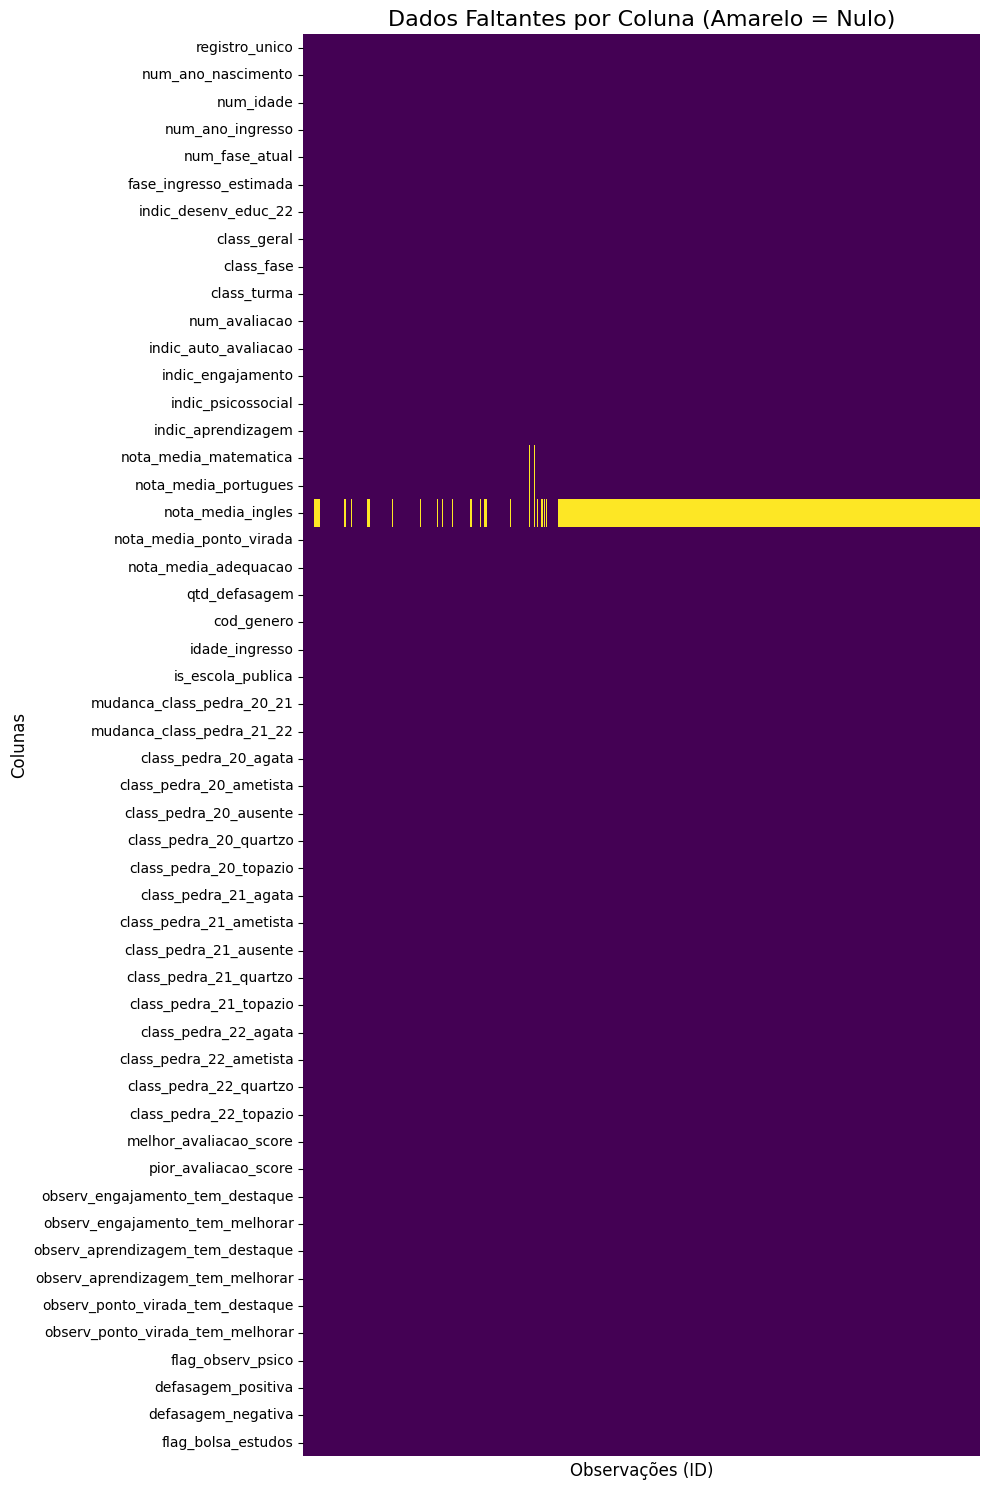

In [77]:
df_2022.to_csv(f"{dir_name}/pede_refined_2022.csv", sep=";", index=False)

plot_missing_data_heatmap_vertical(df_2022)

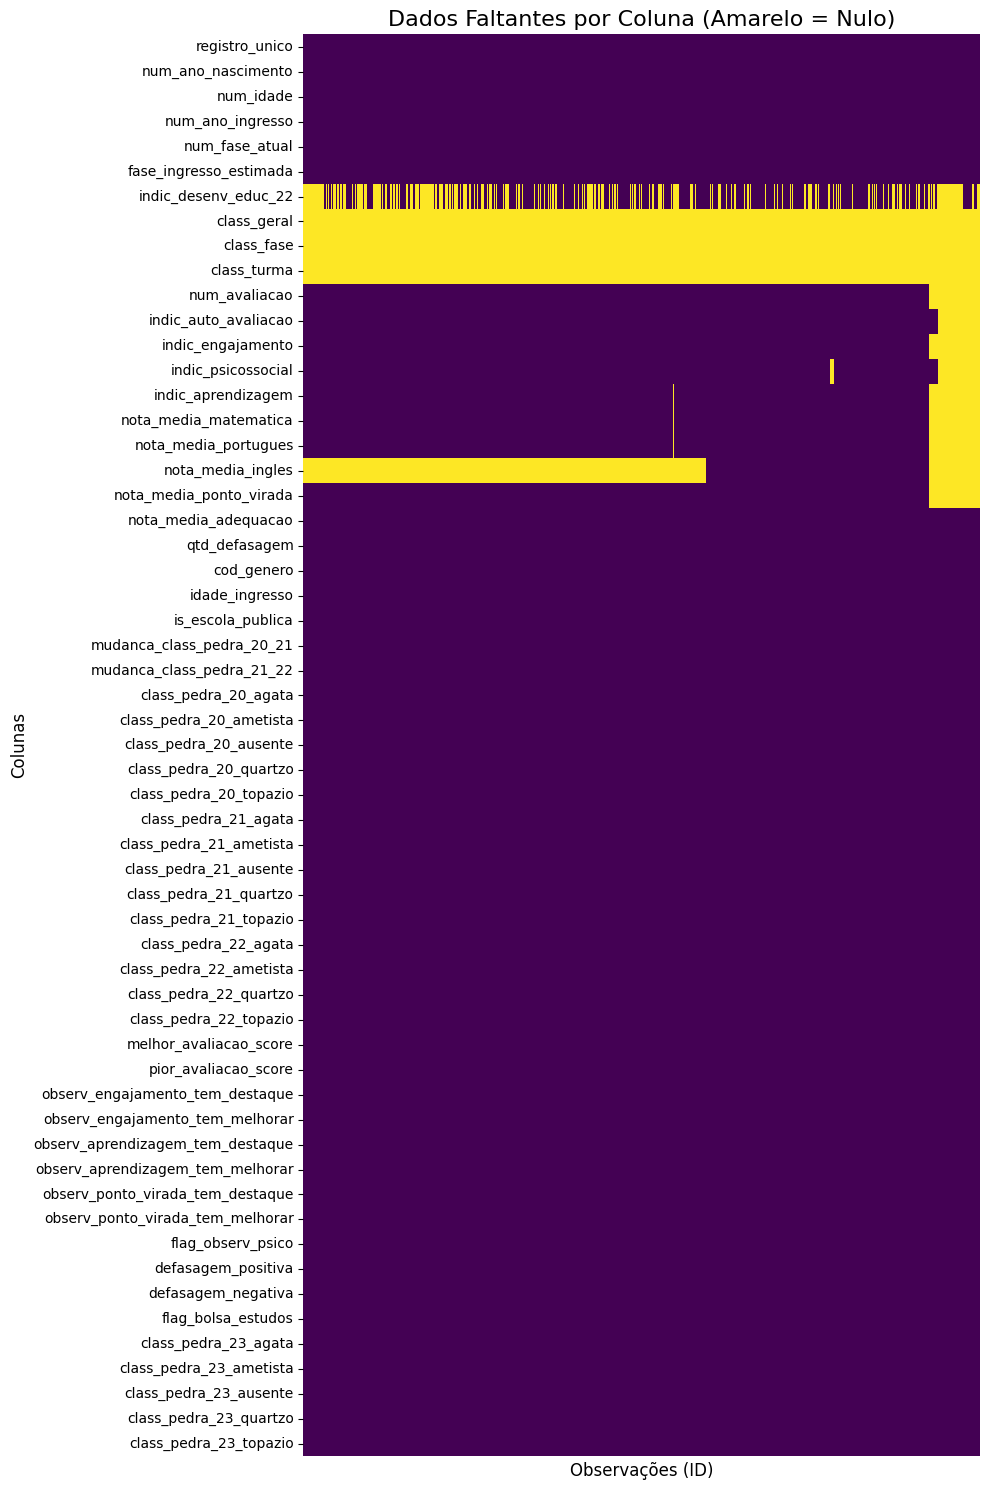

In [78]:
df_2023.to_csv(f"{dir_name}/pede_refined_2023.csv", sep=";", index=False)

plot_missing_data_heatmap_vertical(df_2023)

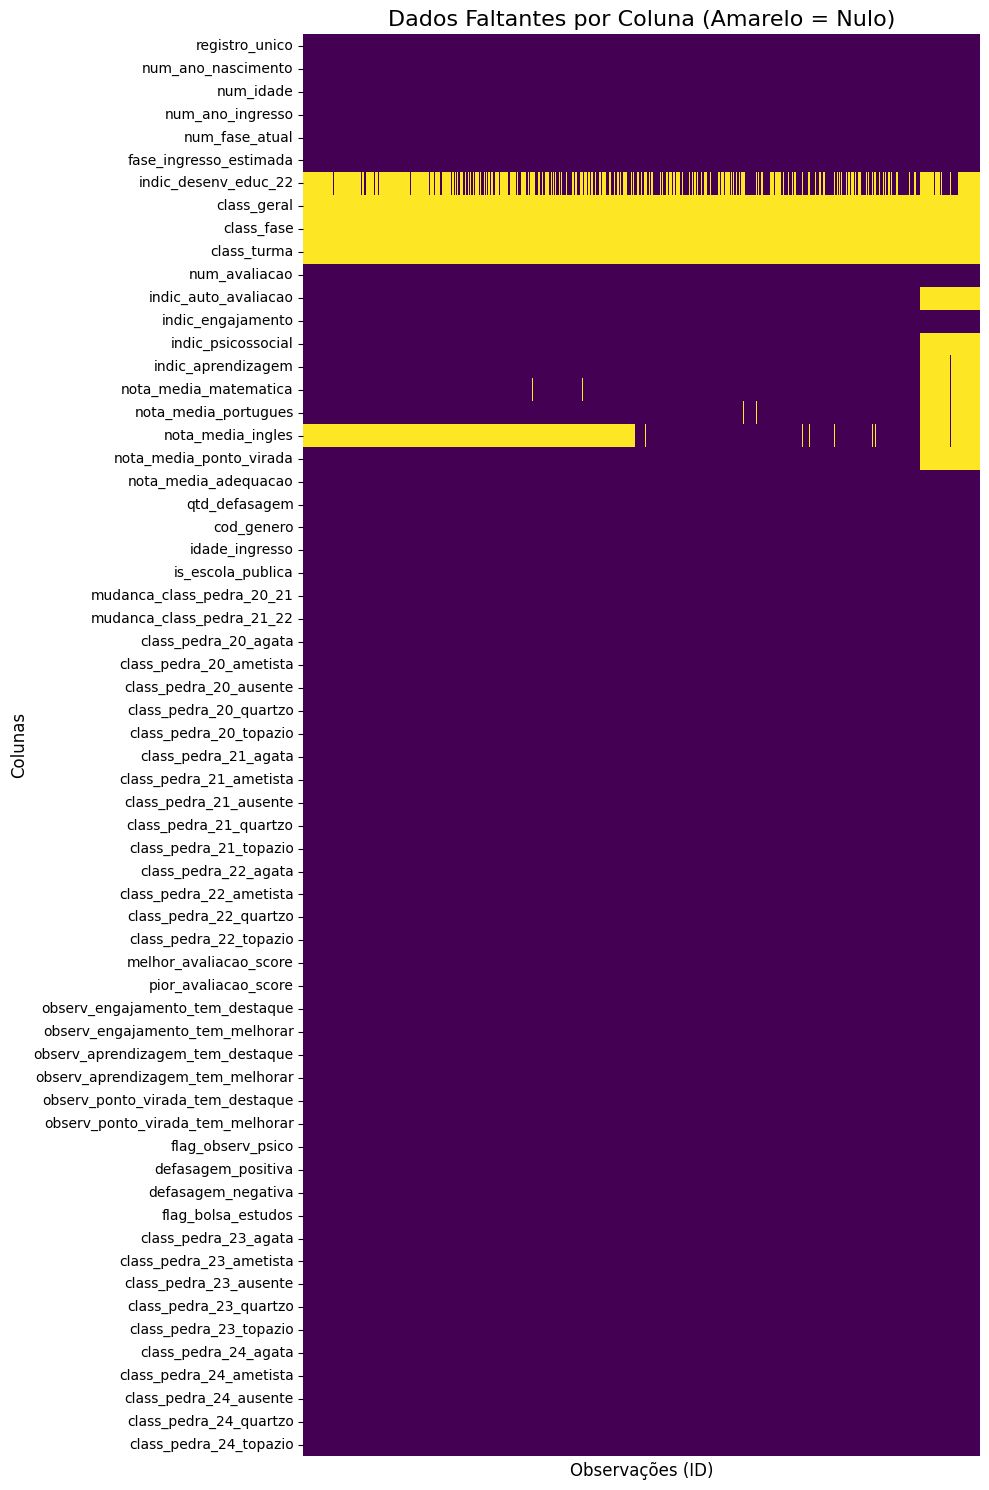

In [79]:
df_2024.to_csv(f"{dir_name}/pede_refined_2024.csv", sep=";", index=False)

plot_missing_data_heatmap_vertical(df_2024)